In [33]:
# %load_ext autoreload
# %autoreload 2

In [34]:
import torch

from templates import *

In [35]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last-v1.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [43]:
data = ImageDataset(folder='imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
l = len(data)
batch = data[0]['img'][None]

KeyboardInterrupt: 

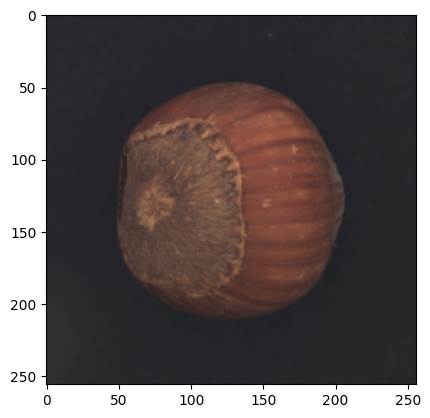

In [37]:
import matplotlib.pyplot as plt

plt.imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)

# Encode

In [38]:
cond = model.encode(batch.to(device))
# cond = torch.randn((1, 512), device=device)
# xT = model.encode_stochastic(batch.to(device), cond, T=250)
xT = torch.randn((1, 3, 256, 256), device=device)
# print(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


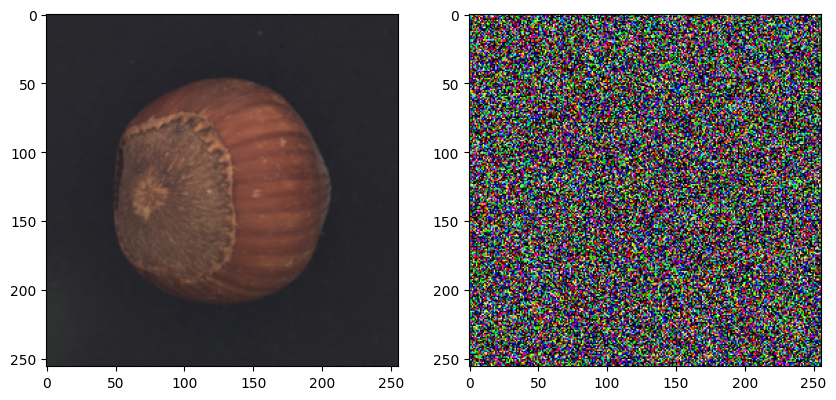

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

# Decode

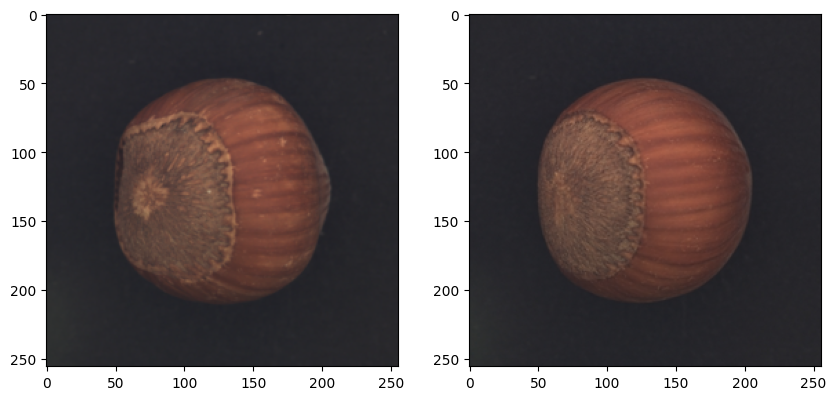

In [41]:
pred = model.render(xT, cond, T=250)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())